In [61]:
!pip install transformers==4.46.2 torch pillow

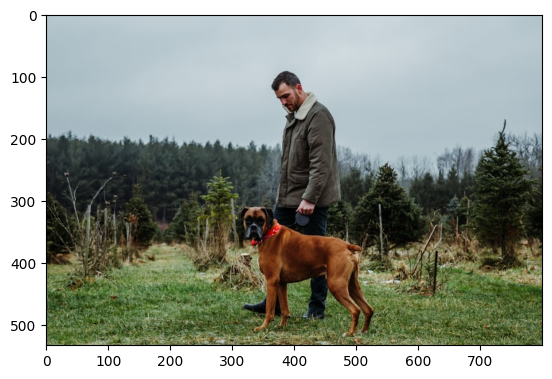

In [58]:
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

image_url = "https://images.unsplash.com/photo-1549563023-d7ac6acd6a00?w=800&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8N3x8bWFuJTIwYW5kJTIwZG9nfGVufDB8fDB8fHww"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

plt.imshow(img)

In [60]:
from transformers import BlipProcessor as bp
from transformers import BlipForConditionalGeneration as bc
from PIL import Image
import requests

# Load the BLIP processor and model
processor = bp.from_pretrained("Salesforce/blip-image-captioning-base")
model = bc.from_pretrained("Salesforce/blip-image-captioning-base")

# Prepare the image for the model
inputs = processor(img, return_tensors="pt")

# Generate the caption
outputs = model.generate(**inputs)
caption = processor.decode(outputs[0], skip_special_tokens=True)

# Display the image and caption
img.show()
print("Generated Caption:", caption)

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Caption: a man walking with his dog in a field
